# Import data package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
seed=45871

# Load data + compute new columns

In [2]:
#Loading the data file
file_path = 'test data_ascending.xlsx'
df = pd.read_excel(file_path)

# Calculating log returns
df['Log_Returns'] = (np.log(df['Last Price']) - np.log(df['Last Price'].shift(1)))*100

# calculate absolute returns
df['AbsoluteReturn'] = df['Last Price'] - df['Last Price'].shift(1)

# calculate squared returns
df['SquaredReturn'] = df['AbsoluteReturn'] ** 2

# Calculate volatility on log returns 
window_size = 2  
df['std_dev'] = df['Log_Returns'].rolling(window=window_size).std()

df = df.dropna().reset_index(drop=True)

# Display data frame
print(df.head())
print(df.tail())

        Date  Last Price  Log_Returns  AbsoluteReturn  SquaredReturn   std_dev
0 2005-04-26       17.15    -1.734148           -0.30         0.0900  3.700323
1 2005-04-27       16.35    -4.777028           -0.80         0.6400  2.151641
2 2005-04-28       15.95    -2.476907           -0.40         0.1600  1.626431
3 2005-04-29       16.40     2.782251            0.45         0.2025  3.718786
4 2005-05-03       16.10    -1.846206           -0.30         0.0900  3.272813
           Date  Last Price  Log_Returns  AbsoluteReturn  SquaredReturn  \
4871 2024-03-25       63.74     5.465136            3.39        11.4921   
4872 2024-03-26       61.06    -4.295532           -2.68         7.1824   
4873 2024-03-27       61.21     0.245359            0.15         0.0225   
4874 2024-03-28       60.58    -1.034577           -0.63         0.3969   
4875 2024-04-01       60.58     0.000000            0.00         0.0000   

       std_dev  
4871  0.982766  
4872  6.901835  
4873  3.210895  
4874  0

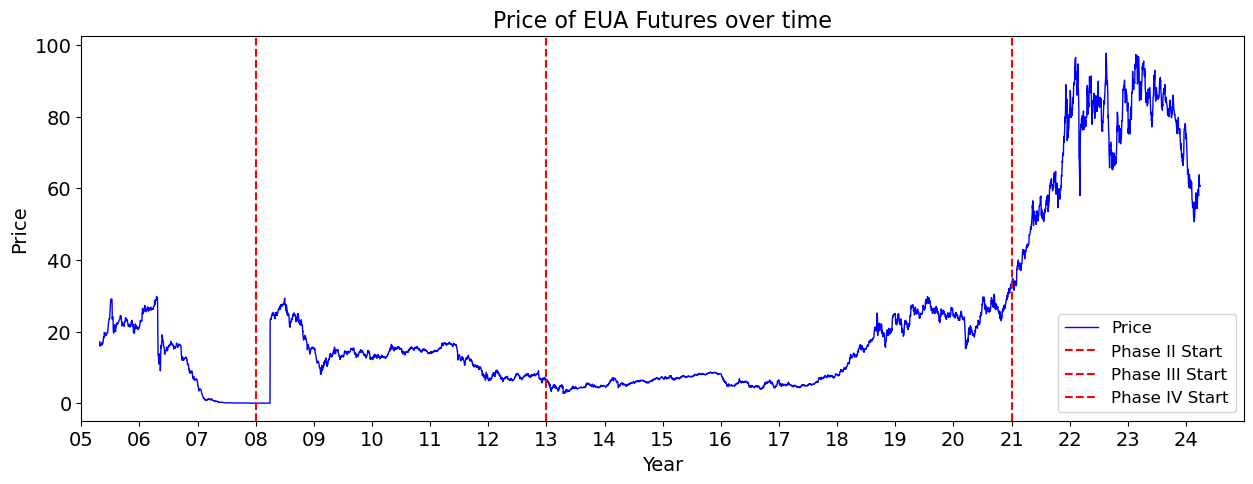

In [3]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df['Date'], df['Last Price'], color='blue', linewidth=1, label='Price')

# Set the x-axis to show each year
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))

# Set limits for x-axis
plt.xlim(['2005-01-01', '2024-12-31'])

# Set dates for trading phases 
phases = {
    'Phase II Start': '2008-01-01',  
    'Phase III Start': '2013-01-01',
    'Phase IV Start': '2021-01-01',
    
}
for phase, start_date in phases.items():
    if pd.to_datetime(start_date) >= df['Date'].min():
        plt.axvline(pd.to_datetime(start_date), color='red', linestyle='--', label=phase)

plt.title('Price of EUA Futures over time', fontsize = 16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 12)
plt.show()

In [4]:
# just get data from 2008-04-03 and onwards
start_date = '2008-04-03'
df = df[df['Date'] >= start_date]

In [5]:
print(df.head())

          Date  Last Price  Log_Returns  AbsoluteReturn  SquaredReturn  \
753 2008-04-03       23.47     0.213265            0.05         0.0025   
754 2008-04-04       23.31    -0.684056           -0.16         0.0256   
755 2008-04-07       23.82     2.164311            0.51         0.2601   
756 2008-04-08       23.51    -1.309970           -0.31         0.0961   
757 2008-04-09       23.69     0.762716            0.18         0.0324   

      std_dev  
753  2.620107  
754  0.634502  
755  2.014099  
756  2.456688  
757  1.465610  


# ACF and PACF - Last Price 

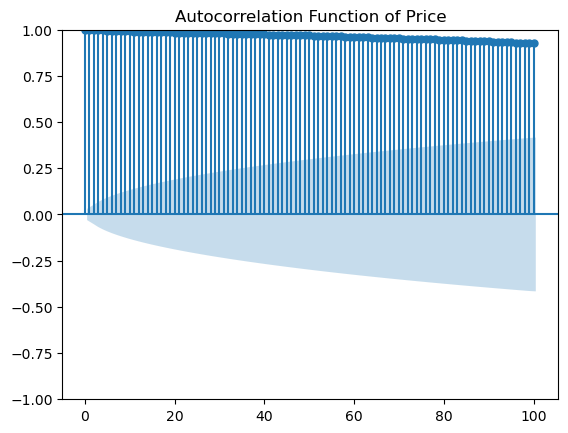

In [6]:
acf_plot = plot_acf(df['Last Price'], lags=100)
plt.title('Autocorrelation Function of Price')

# Show the plot
plt.show()

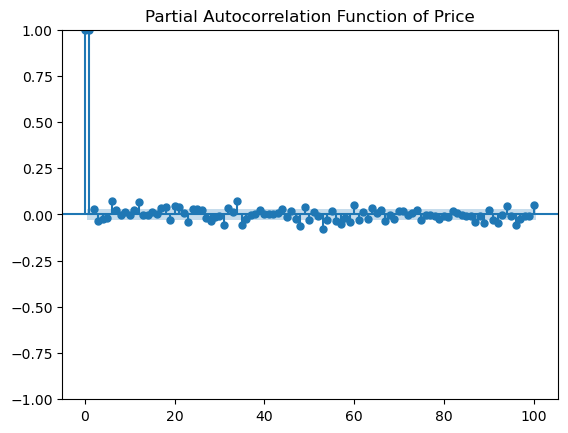

In [7]:
pacf_plot = plot_pacf(df['Last Price'], lags=100)
plt.title('Partial Autocorrelation Function of Price')

# Show the plot
plt.show()

# ACF and PACF for Squared Returns 

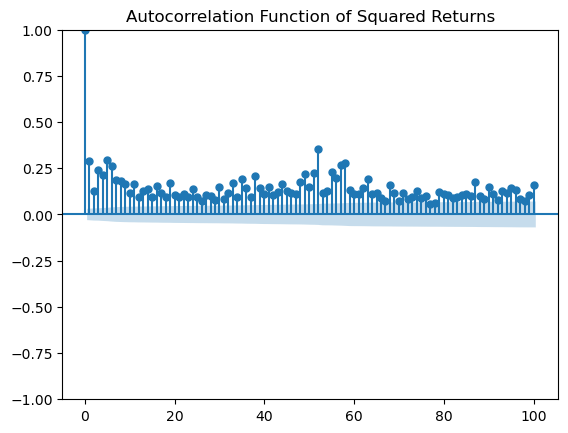

In [8]:
acf_plot = plot_acf(df.SquaredReturn, lags=100)
plt.title('Autocorrelation Function of Squared Returns')

# Show the plot
plt.show()

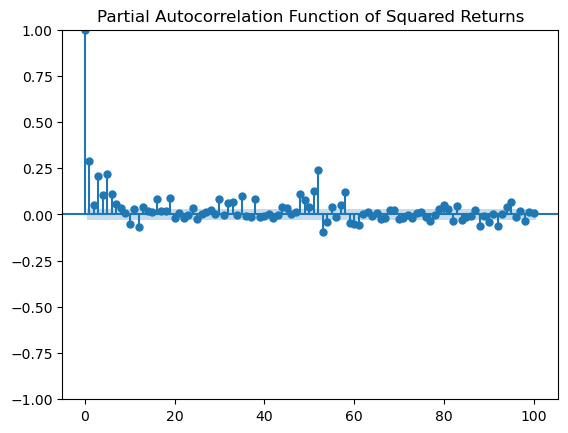

In [9]:
pacf_plot = plot_pacf(df.SquaredReturn, lags=100)
plt.title('Partial Autocorrelation Function of Squared Returns')

# Show the plot
plt.show()

# ACF and PACF on Log Returns 

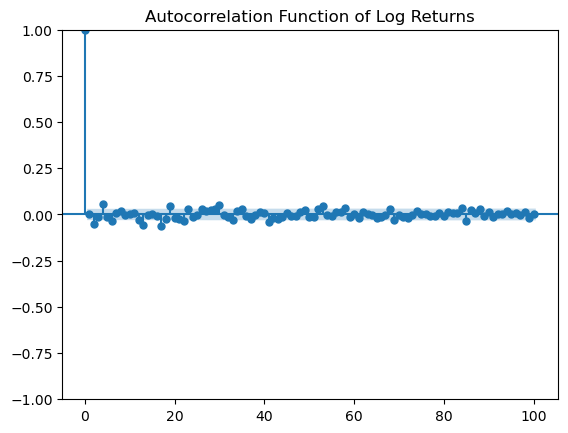

In [10]:
acf_plot = plot_acf(df.Log_Returns, lags=100)
plt.title('Autocorrelation Function of Log Returns')

# Show the plot
plt.show()

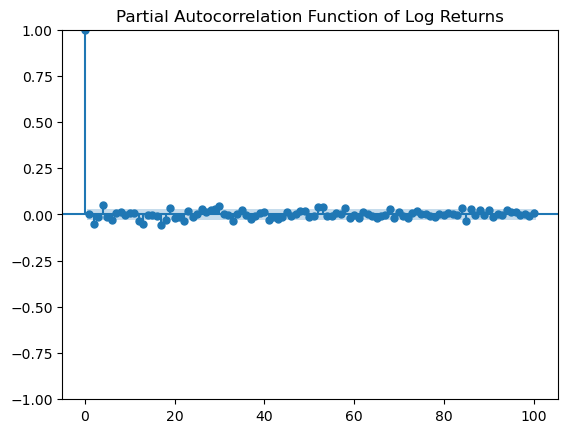

In [11]:
pacf_plot = plot_pacf(df.Log_Returns, lags=100)
plt.title('Partial Autocorrelation Function of Log Returns')

# Show the plot
plt.show()

# Ljung Box test for Log Returns and Squared Returns 

In [12]:
#Define names 
log_returns = df['Log_Returns']
squared_returns = df['SquaredReturn']

In [13]:
# Perform the Ljung-Box test for log returns 
ljung_box_log = acorr_ljungbox(log_returns, lags=100, return_df=True)

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(ljung_box_log)

        lb_stat     lb_pvalue
1      0.001490  9.692049e-01
2     10.563670  5.083095e-03
3     11.381845  9.830528e-03
4     24.370398  6.731657e-05
5     24.913693  1.447830e-04
6     29.862998  4.173721e-05
7     30.194957  8.745013e-05
8     31.808890  1.007749e-04
9     31.816208  2.142306e-04
10    31.915339  4.136542e-04
11    32.205981  7.067817e-04
12    36.281993  2.918463e-04
13    48.783869  4.813049e-06
14    48.809774  9.647697e-06
15    48.826493  1.869348e-05
16    49.288696  2.974024e-05
17    64.666201  1.749476e-07
18    67.051165  1.416053e-07
19    75.565793  1.067134e-08
20    77.017090  1.252244e-08
21    79.707864  9.035116e-09
22    84.843085  2.544439e-09
23    88.091020  1.483308e-09
24    88.637394  2.420209e-09
25    88.638059  4.766925e-09
26    92.157146  2.493708e-09
27    93.477313  2.953616e-09
28    95.722514  2.471571e-09
29    99.874003  1.024825e-09
30   110.363670  4.011435e-11
31   110.387341  7.781343e-11
32   111.116782  1.145532e-10
33   115.1

In [14]:
# Reset display options to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

print(ljung_box_log)

        lb_stat     lb_pvalue
1      0.001490  9.692049e-01
2     10.563670  5.083095e-03
3     11.381845  9.830528e-03
4     24.370398  6.731657e-05
5     24.913693  1.447830e-04
..          ...           ...
96   204.054928  8.890315e-10
97   204.059495  1.309291e-09
98   204.638905  1.643362e-09
99   206.446147  1.479503e-09
100  206.506948  2.125975e-09

[100 rows x 2 columns]


In [15]:
# Perform the Ljung-Box test for squared returns 
ljung_box_squared = acorr_ljungbox(squared_returns, lags=100, return_df=True)

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(ljung_box_squared)

         lb_stat      lb_pvalue
1     340.233985   5.674309e-76
2     409.512438   1.189882e-89
3     648.831044  2.610975e-140
4     836.724622  8.514247e-180
5    1196.337911  1.824784e-256
6    1477.760639   0.000000e+00
7    1620.551540   0.000000e+00
8    1753.433671   0.000000e+00
9    1863.483396   0.000000e+00
10   1918.800699   0.000000e+00
11   2028.918938   0.000000e+00
12   2064.404552   0.000000e+00
13   2129.182851   0.000000e+00
14   2207.678209   0.000000e+00
15   2243.920596   0.000000e+00
16   2343.278678   0.000000e+00
17   2401.589344   0.000000e+00
18   2437.612214   0.000000e+00
19   2557.385307   0.000000e+00
20   2601.546765   0.000000e+00
21   2640.553837   0.000000e+00
22   2691.979148   0.000000e+00
23   2727.245220   0.000000e+00
24   2805.840502   0.000000e+00
25   2842.867772   0.000000e+00
26   2865.246102   0.000000e+00
27   2910.033484   0.000000e+00
28   2952.020500   0.000000e+00
29   2978.715095   0.000000e+00
30   3073.646405   0.000000e+00
31   310

In [16]:
# Reset display options to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

print(ljung_box_squared)

         lb_stat      lb_pvalue
1     340.233985   5.674309e-76
2     409.512438   1.189882e-89
3     648.831044  2.610975e-140
4     836.724622  8.514247e-180
5    1196.337911  1.824784e-256
..           ...            ...
96   8783.123937   0.000000e+00
97   8811.897453   0.000000e+00
98   8836.005029   0.000000e+00
99   8882.975771   0.000000e+00
100  8989.445296   0.000000e+00

[100 rows x 2 columns]
